In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import numpy as np

def plot_images_sample(X, Y):
    # Draw plot for images sample
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

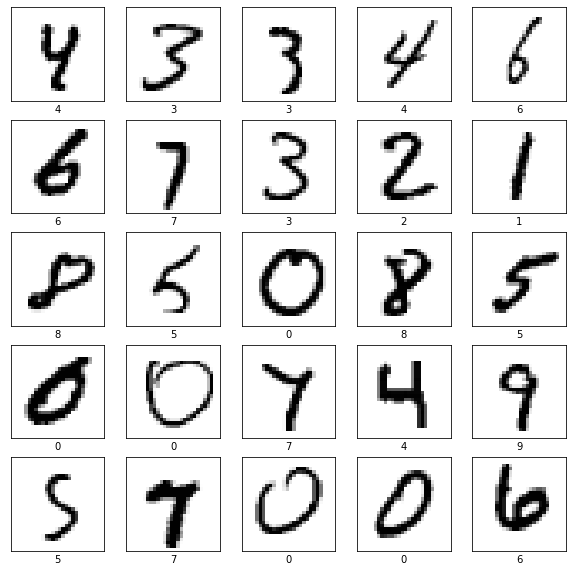

In [4]:
# Draw plot for images sample
plot_images_sample(x_train,y_train)

In [5]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [6]:
# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# Add the first subsampling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Add the second subsampling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

In [7]:
# Flatten the output from the subsampling layers
model.add(Flatten())

# Add the fully connected layer
model.add(Dense(units=120, activation='relu'))

# Add the final fully connected layer
model.add(Dense(units=84, activation='relu'))

# Add the output layer
model.add(Dense(units=10, activation='softmax'))

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 14s 6ms/step - loss: 0.3273 - accuracy: 0.9039 - val_loss: 0.1022 - val_accuracy: 0.9693
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - accuracy: 0.9720 - val_loss: 0.0705 - val_accuracy: 0.9790
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.0571 - val_accuracy: 0.9810
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0500 - accuracy: 0.9842 - val_loss: 0.0478 - val_accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0380 - val_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0346 - accuracy: 0.9883 - val_loss: 0.0363 - val_accuracy: 0.9884
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0354 - val_accuracy: 0.9881
Epoch

In [9]:
# Evaluate the model
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9895
Test loss: 0.03188969939947128
Test accuracy: 0.9894999861717224


313/313 - 1s - loss: 0.0319 - accuracy: 0.9895 - 686ms/epoch - 2ms/step


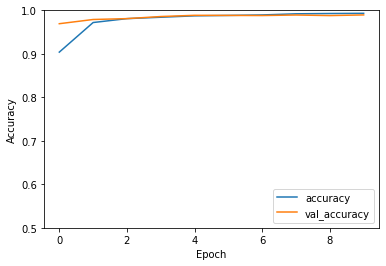

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

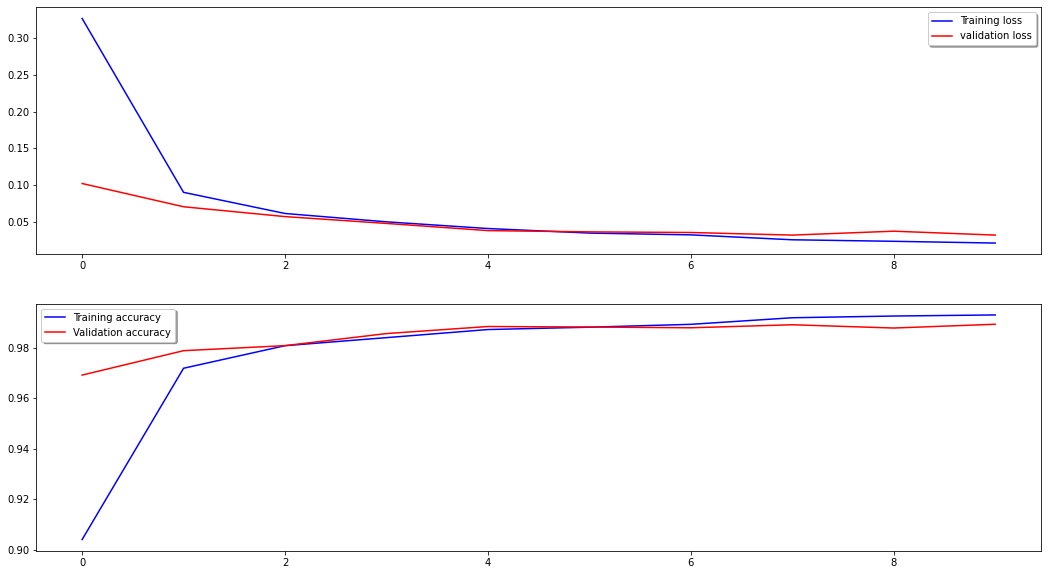

In [11]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
def get_predictions(X_test):
    # Digits prediction
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)
    return predictions

313/313 [==============================] - 1s 2ms/step


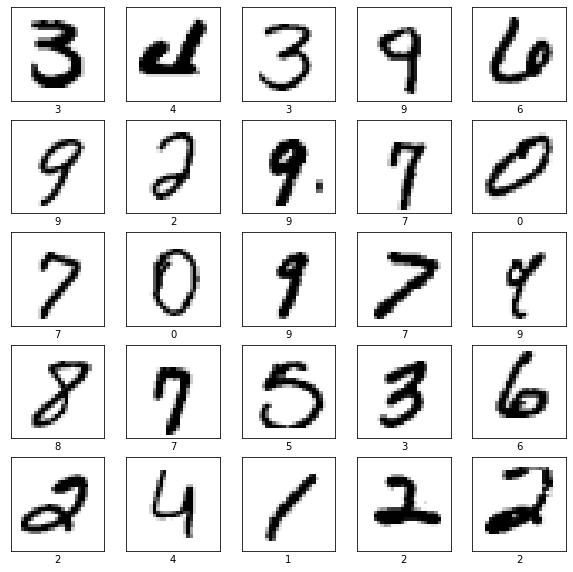

In [13]:
# Prediction and display it
predictions = get_predictions(x_test)
plot_images_sample(x_test, predictions)